# Home assignment #1. Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np

k = list()
X = []

########################################

def filter(x, E):
    for n in range(len(measurements)):
        # prediction
        x = (F * x) + u ## Предиктим следующее положение 
        E = F * E * F.transpose() ## Находим распределение предсказанного положения

        # measurement update
        Z = np.matrix([measurements[n]]) ## принимаем измерения
        S = H * E * H.transpose() + R ## распредление на основе данных измерения
        K = E * H.transpose() * np.linalg.inv(S) ## kalman gain
    
        k.append(K)
        x = x + (K * (Z.transpose() - (H * x)))
        E = (I - (K * H)) * E
        
        X.append(x)
        
        # print('x= ')
        # print(x)
        # print('E= ')
        # print(E)
########################################

In [2]:
dt = 0.1

s_x = 0
s_y = 0
s_Vx = 1000
s_Vy = 1

# E = # initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.matrix([[1, 0, 0, 0],
         [0, 1, 0, 0],
         [0, 0, 1, 1000],
         [0, 0, 1000, 1]])

# F = # next state function: 4D
F = np.matrix([[1, 0, dt, 0],
             [0, 1, 0, dt],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])


# H = # measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.matrix([[1, 0, 0, 0],
             [0, 1, 0, 0]])

# R = # measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.matrix([[0.1, 0],
             [0, 0.1]])

# I = # 4D identity matrix
I = np.eye(4)

In [3]:
print("### First Experiment ###")
measurements = [[5., 10.], [6., 8.], [7., 6.], [8., 4.], [9., 2.], [10., 0.]]
initial_xy = [4., 12.]


x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### First Experiment ###


In [4]:
filter(x, E)

In [5]:
import matplotlib.pyplot as plt

In [6]:
X_array = np.array(X)

In [7]:
X_array[:,0]

array([[ 5.02238582],
       [ 6.01692381],
       [ 7.00938826],
       [ 8.00585127],
       [ 9.00397662],
       [10.00287327]])

In [8]:
X_array[:,1]

array([[ 9.98751517e+00],
       [ 7.99174614e+00],
       [ 5.99549182e+00],
       [ 3.99720111e+00],
       [ 1.99810048e+00],
       [-1.37163111e-03]])

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

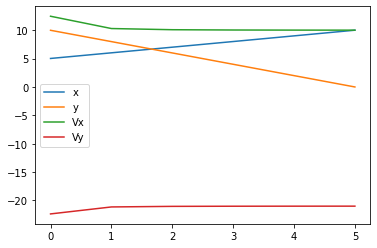

In [9]:
plt.plot(X_array[:,0])
plt.plot(X_array[:,1])
plt.plot(X_array[:,2])
plt.plot(X_array[:,3])

plt.legend(["x","y","Vx", "Vy"])
plt.show()

Visualize the components of the $ K $ matrix below

In [13]:
k_array = np.array(k)

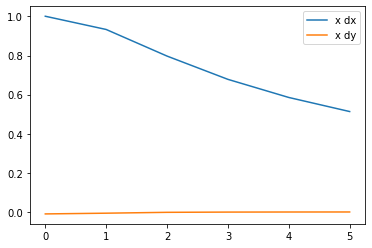

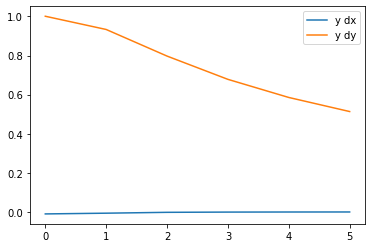

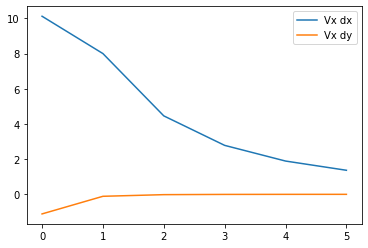

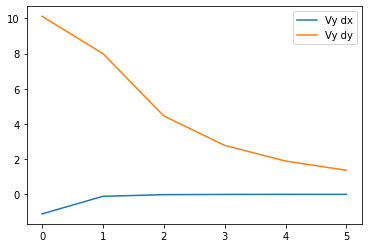

In [25]:
plt.plot(k_array[:,0,0])
plt.plot(k_array[:,0,1])
plt.legend(["x dx","x dy"])
plt.show()

plt.plot(k_array[:,1,0])
plt.plot(k_array[:,1,1])
plt.legend(["y dx","y dy"])
plt.show()

plt.plot(k_array[:,2,0])
plt.plot(k_array[:,2,1])
plt.legend(["Vx dx","Vx dy"])
plt.show()

plt.plot(k_array[:,3,0])
plt.plot(k_array[:,3,1])
plt.legend(["Vy dx","Vy dy"])
plt.show()

In [ ]:
print("### Second Experiment ###")
measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
initial_xy = [-4., 8.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

In [ ]:
filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

Visualize the components of the $ K $ matrix below

In [ ]:
print("### Third Experiment ###")
measurements = [[1., 17.], [1., 15.], [1., 13.], [1., 11.]]
initial_xy = [1., 19.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

In [ ]:
filter(x, E)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

Visualize the components of the $ K $ matrix below

#### Some space for debugging :) 

In [6]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [8]:
A_T = A.T
A_T

array([[1, 3],
       [2, 4]])

In [9]:
A@A_T

array([[ 5, 11],
       [11, 25]])